# code along overfitting and underfitting 

simulate data

$y = a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ 


In [49]:
import numpy as np
import matplotlib.pyplot as plt 

samples = 100
X = np.random.uniform(-3,3, (samples, 1))
X.shape

(100, 1)

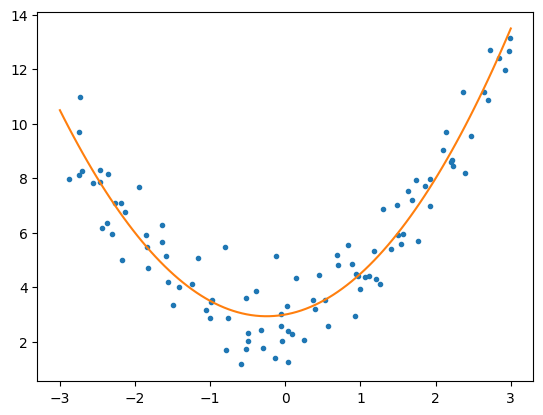

In [50]:

f = lambda x: x**2 + 0.5*x + 3
# y = a0 + a1x + a2x"2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# linspace gives equally spaced numbers between low and high
# between -3 and 3 we get 100 equally spaced numbers 
x = np.linspace(-3,3, samples )
plt.plot(X,y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

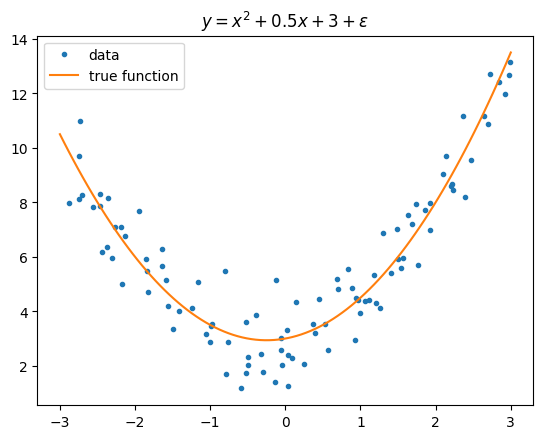

In [51]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X,y, '.', label="data")
    ax.plot(x, f(x), label="true function")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()

    return ax
draw_data()

## polynomial regression 
### Feature engineering

- created polynomial features from dataset

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:

# Bias creates a new column with 1s but the LinearRegression() handels this
poly = PolynomialFeatures(degree=2, include_bias=False)

# from X ha [x1] -> now it has  [x1 x1^2]
poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[ 1.41243761e+00,  1.99498000e+00],
        [ 2.87599493e-02,  8.27134683e-04],
        [-5.86093147e-01,  3.43505177e-01],
        [ 1.10923140e+00,  1.23039430e+00],
        [-2.12944771e+00,  4.53454756e+00]]),
 (100, 2))

In [54]:
0.12847125**2, -1.78749279**2

(0.0165048620765625, -3.1951304743019837)

### Train multiple transformed dataset

- use multiple linear regression on our polynomial features
- this gives us polynomial regression of second order 

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated: a1, a2 from data, note that true value was a1=0.5, a2=1
model.coef_

array([[0.51735887, 0.97723421]])

In [56]:
# estimated a0 from data, note that true a0 = 3
model.intercept_

array([2.96392434])

In [57]:
# x is our linspace, its 1 dimensional so we need to reshape our x
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

### Visualize true model and estimated model 

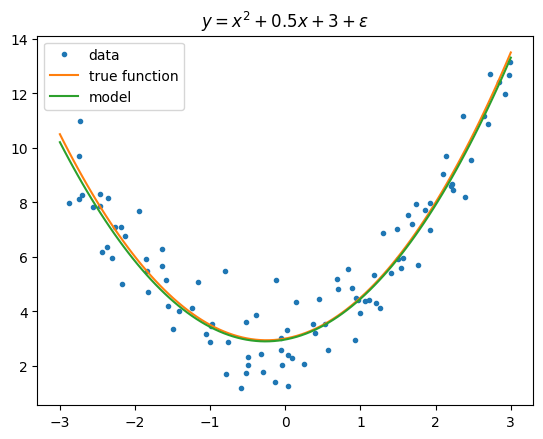

In [58]:
x_poly_features = poly.transform(x.reshape(-1, 1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()


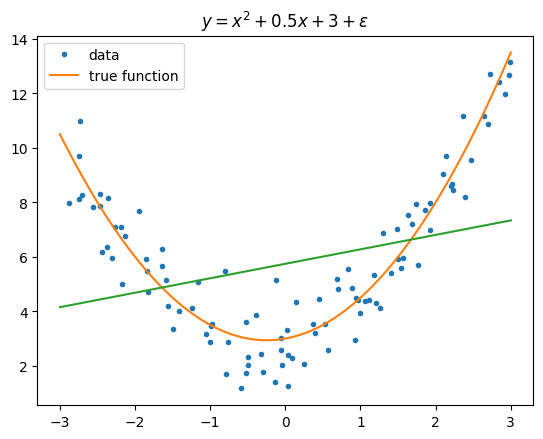

In [59]:
model = LinearRegression()
model.fit(X, y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))

In [60]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)

X_features = poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [61]:
x_poly_features = poly_model_30.transform(x.reshape(-1, 1))
x_poly_features.shape

(100, 30)

[(-1.0, 15.0), Text(0.5, 1.0, 'Overfitted model')]

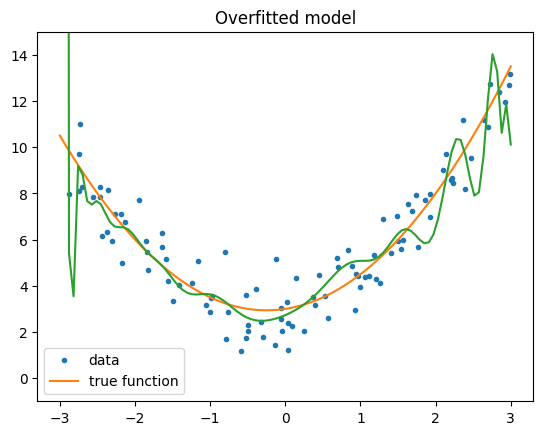

In [62]:
model = LinearRegression()
model.fit(X_features, y)
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1, 15], title="Overfitted model")

### Choose model


In [63]:
samples = 10000

X = np.random.uniform(-3,3, (samples,1))
X.shape

(10000, 1)

In [64]:
f = lambda x: x**4 + x**2 + .5*x + 3

y = f(X) + np.random.randn(samples, 1)

### Train|Validation|test split

split dataset into
- train - train on training set
- validation - tune hyperparameter on validation set 
- test - evaluate on test set

in our case the degree is a hyperparameter 

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# use test set and take half of it to use as test and half as validation 
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)


# 2/3 train 
# 1/3 / 2 validation  
# 1/3 / 2 test

X_train.shape, X_val.shape, X_test.shape


((6700, 1), (1650, 1), (1650, 1))

### Train model and predict on validation 

In [69]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    # feature engineering -> transformed feature space 
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.fit_transform(X_val)


    # polynomial regression -> tarins on transformed feature space 
    model_linear_regression = LinearRegression()
    model_linear_regression.fit(train_features, y_train)

    # predict on validation data
    y_pred_val = model_linear_regression.predict(val_features)
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'RMSE on validation data for diffrent degrees of polynomials')]

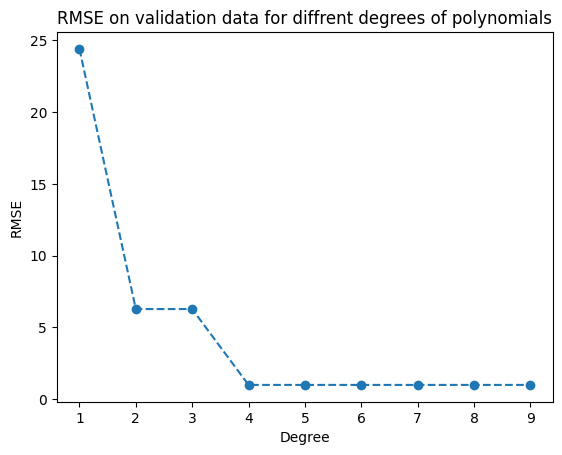

In [77]:
fig, ax =plt.subplots()
ax.plot(range(1, 10), RMSE_val[:9],"--o")
ax.set(
    xlabel="Degree",
    ylabel="RMSE",
    title="RMSE on validation data for diffrent degrees of polynomials"
    )
